<a href="https://colab.research.google.com/github/aleksejalex/expert-octo-eureka/blob/main/Copy_of_RAD_HW_03_cars_copy_with_outputs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Zadani:

..###############** Exercise - Mini Homework 03** ###########

 Investigate a relationship between speed and stopping distance for cars

`summary(cars)`

`?cars`

 Questions:
 1) Display data set (scatter plot, histograms and density plots of speed and dist variables)

 2) Try model with and without intercept

 3) Compute "manually" OLS estimate of regression parameters and error variance

 4) Compute "manually" variance of estimated parameters

 5) Plot data with both estimated regression lines

 6) Investigate output from the lm function

 7) whats the estimated stopping distance for a car going 20mph? (use both models). Compare with the estimated stopping distance for a car going 30mph? (use both models, can we predict this?)

 8) Is the simple linear model good approximation for these problems? Suggest next steps.





# Reseni (vypracovano v Pythonu):

In [1]:
# importy balicku
import inspect
import numpy as np
import scipy as scp
import pandas as pd
import csv
import seaborn as sbn
import matplotlib as mpt
from matplotlib import pyplot as plt
from scipy import stats as st


def retrieve_name(var):
    callers_local_vars = inspect.currentframe().f_back.f_locals.items()
    return [var_name for var_name, var_val in callers_local_vars if var_val is var]


exaaamplevarr = 4
print(exaaamplevarr)
print(retrieve_name(exaaamplevarr))


def get_array_from_df(row_or_column_df):
    """
    input: dataFrame bud radkovy nebo sloupcovy
    output: tytez cisla ale v numpy.array promenne
    """
    #data.loc[:, "Girth"]
    list = row_or_column_df.to_list()
    nparray = np.array(list)
    return nparray



4
['exaaamplevarr']


In [ ]:
# import datasetu (pomoci Pandas)
# (puvodne dataset byl stazen z >>  https://r-data.pmagunia.com/dataset/trees  )
url = "https://raw.githubusercontent.com/aleksejalex/expert-octo-eureka/main/dataset_cars_from_R.csv"
data = pd.read_csv(url)

data
#data.info

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16
5,9,10
6,10,18
7,10,26
8,10,34
9,11,17


# Basic data visualisation

In [ ]:
# basic data visualisation



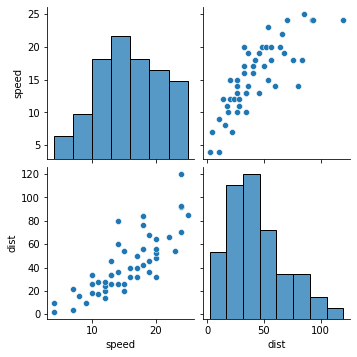

In [ ]:
# pairs
sbn.pairplot(data)

# Basic statistical tests (what data do we have?...)

In [ ]:
# Chi squared test
# H_0: the two samples are independent

from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(data)

print('stat = %.3f, p = %.3f' % (stat, p) )
if p > 0.05:
    print('Probably independed.')
else:
    print('Probably depended.')

stat = 80.580, p = 0.003
Probably depended.


In [ ]:
# Kruskal-Wallis hypo test
# H_0: the dist-s of all id samples are equal

from scipy.stats import kruskal
data1 = data.loc[:,'speed']
data2 = data.loc[:,'dist']
#x = np.random.normal(0, 1, (5, 1))

stat, p = kruskal(data1, data2)
print('stat = %.3f, p = %.3f' % (stat, p) )
if p > 0.05:
    print('Probably same distribution')
else:
    print('Probably different distribution')


print(kruskal(data1,data2))

stat = 42.764, p = 0.000
Probably different distribution
KruskalResult(statistic=42.7643169651708, pvalue=6.174829983580955e-11)


# Linear regression (linear model)

In [ ]:
# OLS - ordinary least squares model

import statsmodels.api as sm

x = data[['speed','dist']]
y = data['dist']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()


print_model = model.summary()
print(print_model)



                            OLS Regression Results                            
Dep. Variable:                   dist   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.629e+30
Date:                Wed, 12 Oct 2022   Prob (F-statistic):               0.00
Time:                        23:00:52   Log-Likelihood:                 1469.0
No. Observations:                  50   AIC:                            -2932.
Df Residuals:                      47   BIC:                            -2926.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.599e-14   2.04e-14      0.784      0.4

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Estimated coefficients:
b_0 = 1.2363636363636363 		
b_1 = 1.1696969696969697


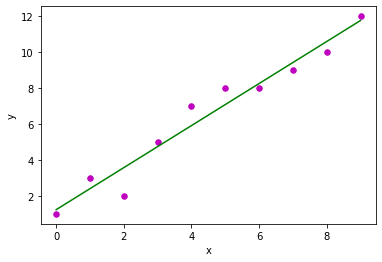

In [ ]:
#############################################################
# zkousim si linearni regreesi - napsana rucne:
# tj. vypocet podle vzorcu

import numpy as np
import matplotlib.pyplot as plt

def estimate_coef(x, y):
	# number of observations/points
	n = np.size(x)

	# mean of x and y vector
	m_x = np.mean(x)
	m_y = np.mean(y)

	# calculating cross-deviation and deviation about x
	SS_xy = np.sum(y*x) - n*m_y*m_x
	SS_xx = np.sum(x*x) - n*m_x*m_x

	# calculating regression coefficients
	b_1 = SS_xy / SS_xx
	b_0 = m_y - b_1*m_x

	return (b_0, b_1)

def plot_regression_line(x, y, b):
	# plotting the actual points as scatter plot
	plt.scatter(x, y, color = "m",
			marker = "o", s = 30)

	# predicted response vector
	y_pred = b[0] + b[1]*x

	# plotting the regression line
	plt.plot(x, y_pred, color = "g")

	# putting labels
	plt.xlabel('x')
	plt.ylabel('y')

	# function to show plot
	plt.show()

def main():
	# observations / data
	x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
	y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12])

	# estimating coefficients
	b = estimate_coef(x, y)
	print("Estimated coefficients:\nb_0 = {} \
		\nb_1 = {}".format(b[0], b[1]))

	# plotting regression line
	plot_regression_line(x, y, b)

if __name__ == "__main__":
	main()
